In [1]:
import os
import datetime
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# import plotly.express as px

In [2]:
path = '/data/raw/edstats-csv-zip-32-mb-'
fname = 'EdStatsData.csv'

In [3]:
df = pd.read_csv(os.path.join(path,fname))

In [4]:
df.loc[df['1970'].notna()].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# df['Country Name'].unique()

In [6]:
inds = df.loc[(df['Country Name']=='United States') & (df['2010'].notna())]['Indicator Name'].unique()

In [7]:
for i in inds:
    # print(i)
    # pattern = 'drop-out rate from .* primary .* both sexes .*'
    pattern1 = 'adjusted net enrolment rate'
    regex1 = re.compile(pattern1, re.IGNORECASE)
    pattern2 = 'gender'
    regex2 = re.compile(pattern2, re.IGNORECASE)
    if regex1.search(i) and not regex2.search(i):
        print(i)

Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, female (%)
Adjusted net enrolment rate, lower secondary, male (%)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, male (%)


In [8]:
prim_dropout_rate = df.query(
    '`Country Name` == "United States"'
    'and `Indicator Name`.str.contains(@pattern1, case=False, na=False)'
    'and not `Indicator Name`.str.contains(@pattern2, case=False, na=False)'
)

In [9]:
prim_dropout_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
846615,United States,USA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846616,United States,USA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846618,United States,USA,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846619,United States,USA,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846620,United States,USA,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846622,United States,USA,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846623,United States,USA,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846624,United States,USA,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846626,United States,USA,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
long = prim_dropout_rate.melt(
    id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],
    value_vars=None,
    var_name='Year',
    value_name='Metric',
    # col_level: 'Level | None' = None,
    # ignore_index: 'bool' = True,
)

In [17]:
plot_df = long.loc[long.Metric.notna()]
plot_df['Segment'] = plot_df['Indicator Name']\
    .str.split(',').str[1:].str.join(' -').str.strip().str[:-4]

/tmp/ipykernel_9/2108027296.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



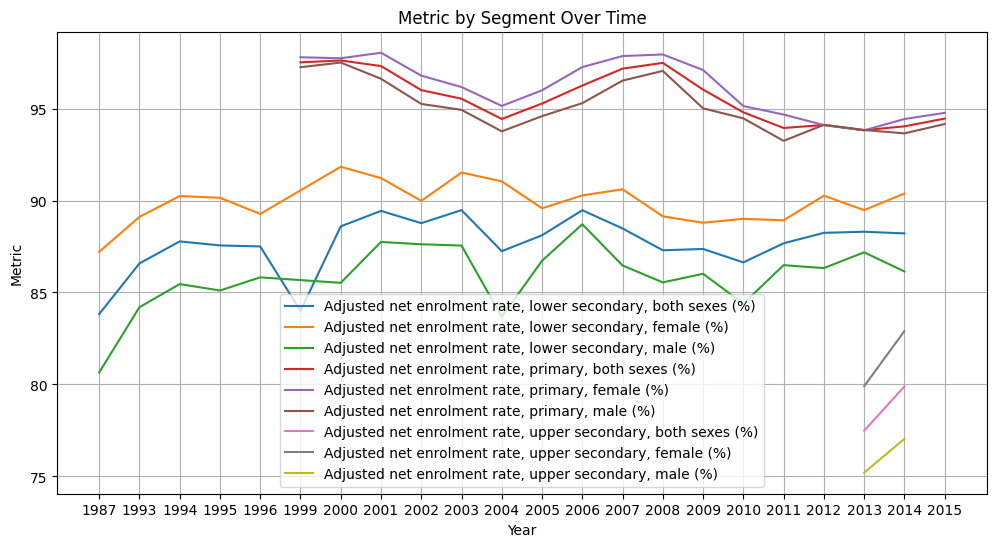

In [18]:
# Get unique segments
segments = plot_df['Indicator Name'].unique()

# Create plot
plt.figure(figsize=(12, 6))

# Iterate through segments and plot each one
for segment in segments:
    # Filter data for this segment
    mask = plot_df['Indicator Name'] == segment
    segment_data = plot_df[mask]
    
    # Plot this segment's line
    plt.plot(segment_data['Year'], 
             segment_data['Metric'], 
             label=segment,)
            #  marker='-')  # optional: adds points at each data point

# Customize plot
plt.title('Metric by Segment Over Time')
plt.xlabel('Year')
plt.ylabel('Metric')
plt.legend()
plt.grid(True)

plt.show()

In [19]:
# help(pd.DataFrame.plot)

In [20]:
# Create figure
fig = go.Figure()

# Add traces for each segment
for segment in plot_df['Segment'].unique():
    segment_data = plot_df[plot_df['Segment'] == segment]
    
    fig.add_trace(
        go.Scatter(
            x=segment_data['Year'],
            y=segment_data['Metric'],
            name=segment,
            mode='lines+markers',  # 'lines', 'markers', or 'lines+markers'
            hovertemplate='%{x}<br>' +
                         f'{segment}: %{{y:.1f}}%' +
                         '<extra></extra>'
        )
    )

# Update layout
fig.update_layout(
    title='Metrics by Segment Over Time',
    xaxis_title='Year',
    yaxis_title='Metric',
    yaxis=dict(
        tickformat='.0f',  # one decimal place
        ticksuffix='%'     # add % to each tick
    ),
    height=700,
    margin=dict(t=200),  # increase top margin for legend
    legend=dict(
        yanchor="bottom",
        y=1.02,        # moves legend above the plot area
        xanchor="left",
        x=0.01,
        orientation="h",
        font=dict(
            size=10     # makes legend text smaller (default is usually 12)
        )
    )
)

# You might also want to adjust the title position
fig.update_layout(
    title=dict(
        y=0.95,        # moves title higher to make room for legend
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Show the plot
fig.show()

In [21]:
plot_df[['Year','Segment','Metric']]\
    .to_csv('/data/processed/edu.csv',index=False)